In [95]:
import sys
import os
#change this to SR path
spr_path = "/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/code/SpringRank/python"
sys.path.append(os.path.abspath(spr_path))
import SpringRank_tools as SR
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import time
import pandas as pd
import math
import re
import matplotlib.ticker as ticker
import numpy as np
import networkx as nx
import numpy as np
import SpringRank_tools as sr
import tools as tl

In [23]:
input_data_dir = '/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/github/SpringRank/data/input/'
output_data_dir = '/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/github/SpringRank/data/output/'

In [98]:
# data --> https://github.com/JeffSackmann/tennis_atp
# Extracting from each line the winner, loser and the surface type of the court.
# Returns three separate adjacency matrices (1.  All 2. only hard 3. only clay)
def getAdjByYear(year,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years):
    score_map = {}
    #hard surface 
    score_map_hard = {}
    #clay surface
    score_map_clay = {}
    idToName_map = {}
    with open(input_data_dir+"Tennis/tennis_atp/atp_matches_"+str(year)+".csv",'r') as tennis:
        tennis = csv.reader(tennis,delimiter=',')
        next(tennis, None)  # skip the headers
        for row in tennis:
            isHard = True if row[2] == 'Hard' else False
            
            #winnder index
            if row[7] not in teamIdMap:
                teamIdMap[row[7]] = nextIdx
                nextIdx+=1
                idToName_map[row[7]] = row[11]
                
            #loser index
            if row[17] not in teamIdMap:
                teamIdMap[row[17]] = nextIdx
                nextIdx+=1
                idToName_map[row[17]] = row[20]
            i = teamIdMap[row[7]]
            j = teamIdMap[row[17]]
            if isHard:
                if (i,j) not in score_map_hard:
                    score_map_hard[(row[7],row[17])] = 1
                else:
                    score_map_hard[(row[7],row[17])] += 1
            else:
                if (i,j) not in score_map_clay:
                    score_map_clay[(row[7],row[17])] = 1
                else:
                    score_map_clay[(row[7],row[17])] += 1
                
    Adj = np.zeros((len(teamIdMap),len(teamIdMap)),dtype=np.int)
    Adj_hard = np.zeros((len(teamIdMap),len(teamIdMap)),dtype=np.int)
    Adj_clay = np.zeros((len(teamIdMap),len(teamIdMap)),dtype=np.int)

    for ((a,b),j) in score_map_hard.items():
        k = int(teamIdMap[a])
        l = int(teamIdMap[b])
        Adj_hard[k,l] += score_map_hard[(a,b)]
        Adj[(k,l)] += score_map_hard[(a,b)]
        
    for ((a,b),j) in score_map_clay.items():
        k = int(teamIdMap[a])
        l = int(teamIdMap[b])
        Adj_clay[k,l] += score_map_clay[(a,b)]
        Adj[(k,l)] += score_map_clay[(a,b)]
            
    #required for springrank algo
    Adj = np.matrix(Adj,copy=False)
    Adj_hard = np.matrix(Adj_hard,copy=False)
    Adj_clay = np.matrix(Adj_clay,copy=False)
    Adj_All.append(Adj);Adj_All_hard.append(Adj_hard);Adj_All_clay.append(Adj_clay);Adj_years.append(str(year))
    return Adj,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years


In [86]:
teamIdMap = {}
nextIdx = 0;
Adj_All = []
Adj_All_hard = []
Adj_All_clay = []
Adj_years = []

In [87]:
#TODO find a better way
Adj_2008,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2008,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2009,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2009,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2010,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2010,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2011,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2011,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2012,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2012,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2013,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2013,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2014,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2014,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2015,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2015,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2016,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2016,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2017,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2017,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)
Adj_2018,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years = getAdjByYear(2018,nextIdx,teamIdMap,Adj_All,Adj_All_hard,Adj_All_clay,Adj_years)


In [88]:
def run(A,alpha,l0,l1):
    '''
    Extracts SpringRank
    '''
    rank=sr.SpringRank(A,alpha=alpha,l0=l0,l1=l1)
    rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive
    
    unordered_tuples=[(i,rank[i]) for i in range(A.shape[0])]
    return rank,unordered_tuples

def save(sorted_tuples,alpha,l0,l1,G,file):
    '''
    Prints results
    '''
    print('SpringRank scores:')
    outfile=output_data_dir+'/'+file+'_SpringRank_'+'a'+str(alpha)+'_l0_'+str(l0)+'_l1_'+str(l1)+'.dat'
    outf=open(outfile,'w')

    for i in range(G.number_of_nodes()):
        outf.write("{} {}\n".format(sorted_tuples[i][0],sorted_tuples[i][1]))
    print('Results saved in:', outfile)
    outf.close()
    


In [100]:

def prediction(beta,Adj,scores):
    preds={}
    size=Adj.shape[0]
    for i in range(0,size):
        for j in range(0,size):
            si=0;sj=0
            if(Adj[(i,j)]>0 or Adj[(j,i)]>0):
                if(i<len(scores) and j<len(scores)):
                    si=scores[i];sj=scores[j]
                preds[(i,j)] = (1/(1+np.exp(-beta*2*(si-sj))))
            else: preds[(i,j)] = 0
    return preds


def getAccuracy(preds,Adj,num_edges):
    total=0
    size = Adj.shape[0]
    counter = 0
    for i in range(0,size):
        for j in range(0,size):
            if(i!=j and (Adj[(i,j)]>0 or Adj[(j,i)]>0)):
                x = ((Adj[i,j])-((Adj[i,j]+Adj[j,i])*preds[(i,j)]))
                total +=abs(x)

    total = 1-((total*1.0)/(2*num_edges))
    return total

def trainBetaAndRanks(A,alpha,l0,l1):
    ranks,tuples = run(A,alpha,l0,l1)
    temp=tl.get_optimal_temperature(ranks,A)
    beta = 1/temp
    print("Optimal Beta: "+str(beta))
    return beta,ranks

def getPredictionsAndAccuracy(beta,A,ranks):
    preds = prediction(beta,A,ranks)
    acc = getAccuracy(preds,A,A.sum())
    print("Accuracy : "+str(acc))
    return preds,acc

In [66]:
# Take a network ; find optimal beta and ranks ; also predict accuracy on itself
def trainingExperiment(A,alpha,l0,l1):
    beta,ranks = trainBetaAndRanks(A,alpha,l0,l1)
    preds,acc =  getPredictionsAndAccuracy(beta,A,ranks)
    return beta,ranks,preds,acc

# Helper function  -> given Adjacency lists, train a network and predict/find accuracy for the rest 
def trainOneToMany(indexToTrain,Adj_All,Adj_years,title):
    accu_map = {}
    A1 = Adj_All[indexToTrain]
    A1_beta,A1_ranks,A1_preds,A1_acc = trainingExperiment(A1,0,0,1)
    # random model (network with no edges)
    null_adj = np.zeros((A1.shape[0],A1.shape[0]),dtype=np.int)
    null_adj = np.matrix(null_adj,copy=False)
    null_beta,null_ranks,_,__ = trainingExperiment(null_adj,0,0,1)
    for i in range(indexToTrain,len(Adj_years)):
        print(Adj_years[indexToTrain]+"-->"+Adj_years[i])
        A2 = Adj_All[i]
        A2_preds,A2_acc = getPredictionsAndAccuracy(A1_beta,A2,A1_ranks)
        null_preds,null_acc = getPredictionsAndAccuracy(null_beta,A2,null_ranks)
        accu_map[Adj_years[i]] = (A1_acc,A2_acc,null_acc)
    return accu_map

# Run the entire experiment for all years  
def trainManyToMany(Adj_All,Adj_years):
    accu_map_all = {}
    for i in range(0,len(Adj_All)-1):
        accu_map_all[Adj_years[i]] = trainOneToMany(i,Adj_All,Adj_years,Adj_years[i])
    return accu_map_all

In [103]:
# Helper func.
# Plot years from given map
def plotYOYAccuracy(Adj_years,accu_map,title):
    def func_formatter(x,pos):
        if(pos<1 or pos > len(Adj_years)+3): return ""
        else:
            yr_regex = r"[0-9]{2}$"
            match = re.search(yr_regex,(str((int(x)))))
            return match.group(0)+'\''
        
    training_acc = []
    null_acc = []
    predic_acc = []
    x_axis = []
    xi = []
    for i in range(0,len(Adj_years)):
        (t,p,n) = accu_map[Adj_years[i]]
        null_acc.append(n)
        training_acc.append(t)
        predic_acc.append(p)
        x_axis.append(Adj_years[i])
        xi.append(x_axis)
    plt.figure(figsize=(15,5))
    plt.xlabel('Years')
    plt.ylabel('Accuracy')
    plt.ylim([0.4,0.8])
    plt.title(title)
    plt.plot(x_axis,training_acc,'o',label='Training accuracy')
    plt.plot(x_axis,null_acc,'kx--',label='Random Model Accuracy')
    plt.plot(x_axis,predic_acc,'rx--',label='Prediction accuracy')
    for (_idx,(_x,y1,y2)) in enumerate(zip(x_axis,predic_acc,null_acc)):
        plt.plot((_x,_x),(y1,y2),'y-') if y1>y2 else plt.plot((_x,_x),(y1,y2),'b-')
    plt.legend(loc='best')
    plt.margins(x=0.08,tight=True)
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    _=ax.xaxis.set_major_formatter(ticker.FuncFormatter(func_formatter))
    plt.show()

def plotAllYears(Adj_years,accu_map_all,title):
    for i in range(0,len(Adj_years)-1):
        plotYOYAccuracy(Adj_years[i:],accu_map_all[Adj_years[i]],title+' Training Year: '+str(Adj_years[i]))

# Run experiment with matches played on both surface types

In [68]:
# Train all to all. Returns accuracy for each year against other years  
accu_map_all = trainManyToMany(Adj_All,Adj_years)

Optimal Beta: 0.7020343925353425
Accuracy : 0.644796224059
Optimal Beta: 100.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in true_divide


Accuracy : nan
2008-->2008
Accuracy : 0.644796224059
Accuracy : 0.548625792812
2008-->2009
Accuracy : 0.60654328753
Accuracy : 0.555875991348
2008-->2010
Accuracy : 0.594154397577
Accuracy : 0.557204147301
2008-->2011
Accuracy : 0.591090642285
Accuracy : 0.55732946299
2008-->2012
Accuracy : 0.588889755952
Accuracy : 0.552014652015
2008-->2013
Accuracy : 0.582264253061
Accuracy : 0.560344827586
2008-->2014
Accuracy : 0.573997362336
Accuracy : 0.552531404644
2008-->2015
Accuracy : 0.569171020678
Accuracy : 0.550285714286
2008-->2016
Accuracy : 0.570445863314
Accuracy : 0.555617977528
2008-->2017
Accuracy : 0.560857994229
Accuracy : 0.553714285714
2008-->2018
Accuracy : 0.554926112329
Accuracy : 0.54604130809
Optimal Beta: 0.7180646274797081
Accuracy : 0.654527766629
Optimal Beta: 100.0
Accuracy : nan
2009-->2009
Accuracy : 0.654527766629
Accuracy : 0.555875991348
2009-->2010
Accuracy : 0.601685255081
Accuracy : 0.557204147301
2009-->2011
Accuracy : 0.596604568164
Accuracy : 0.55732946299

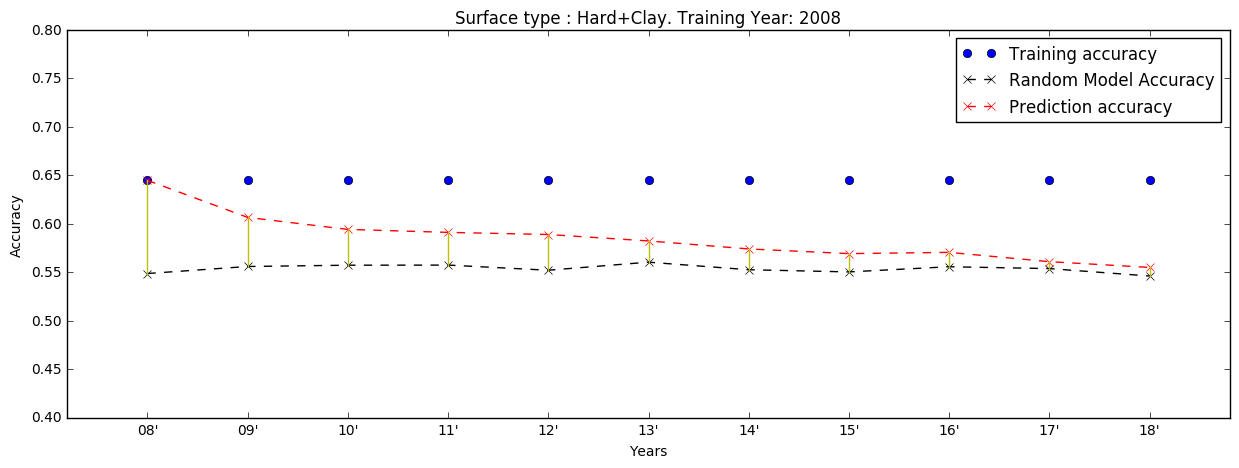

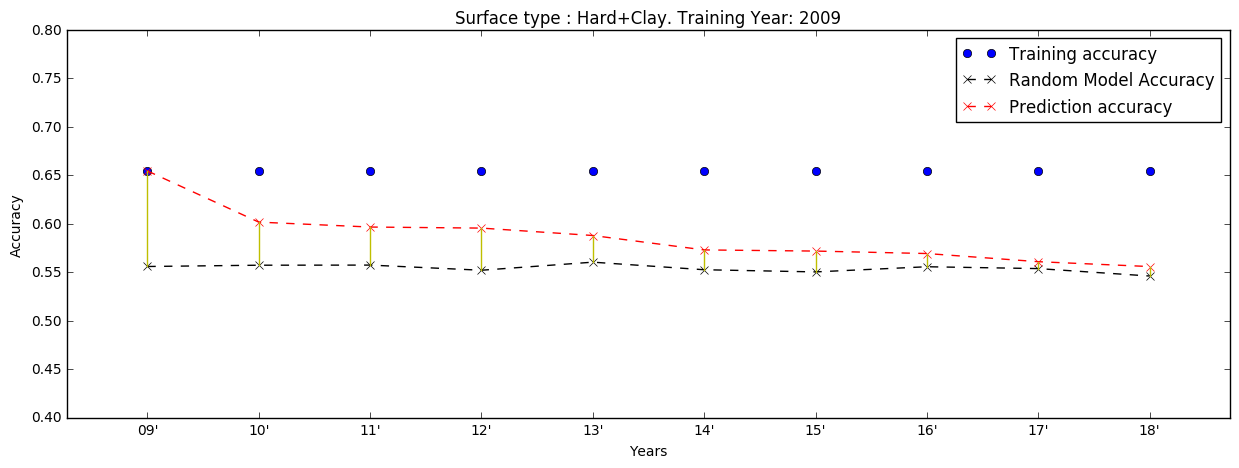

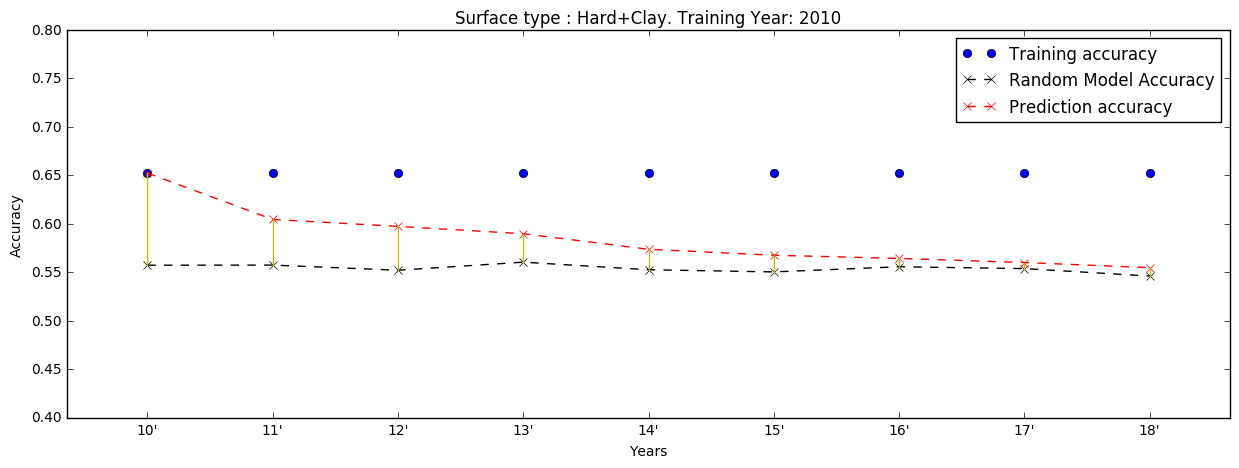

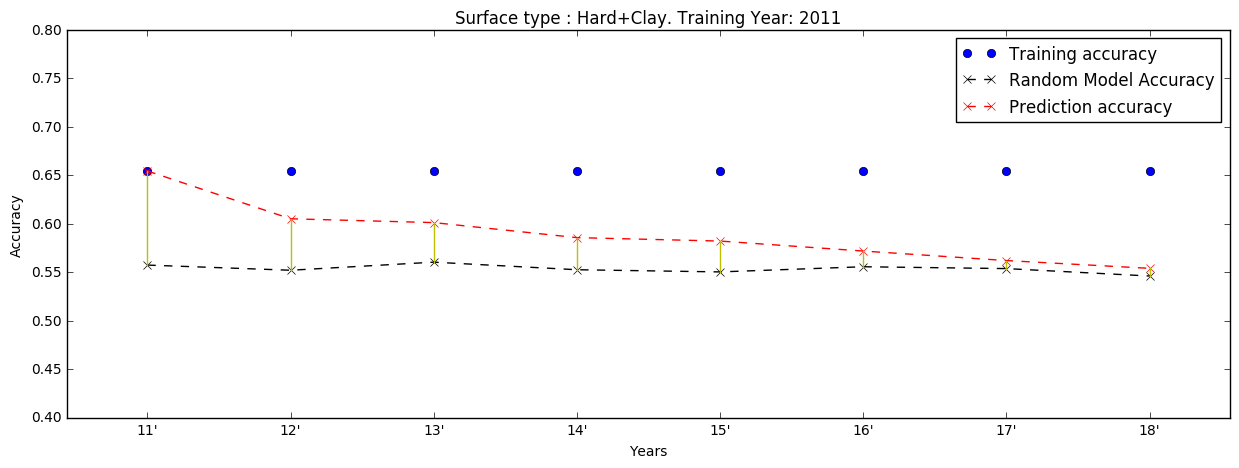

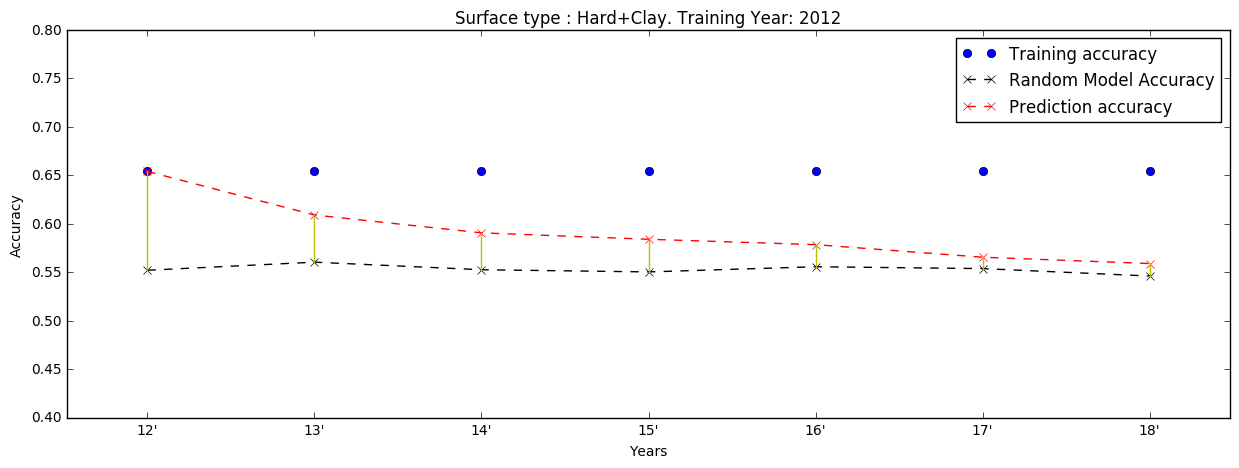

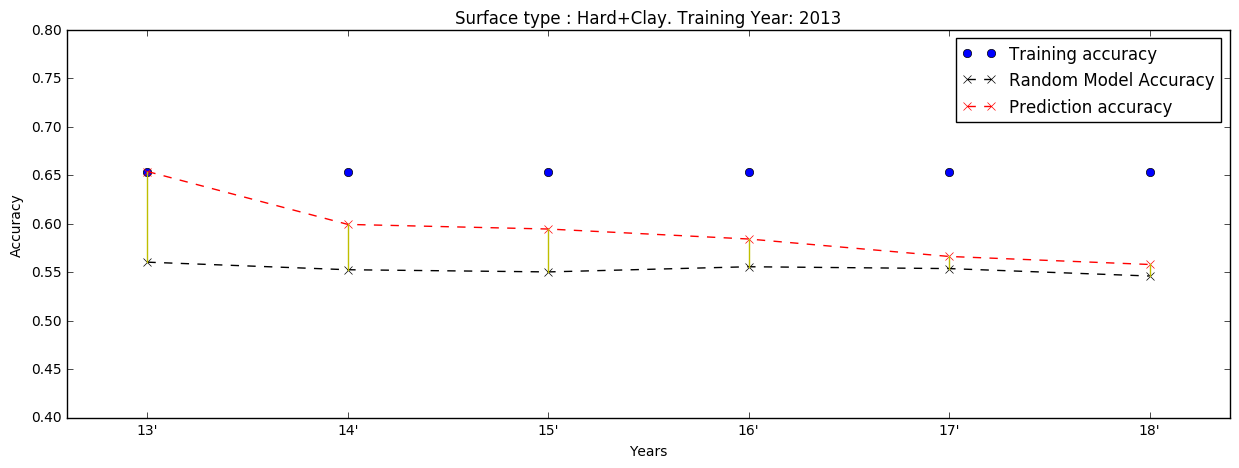

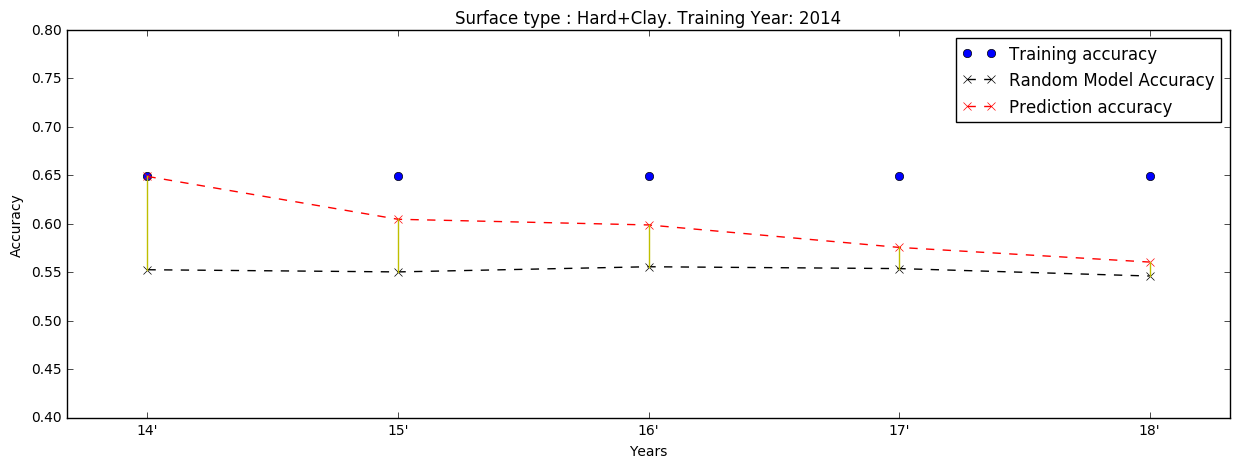

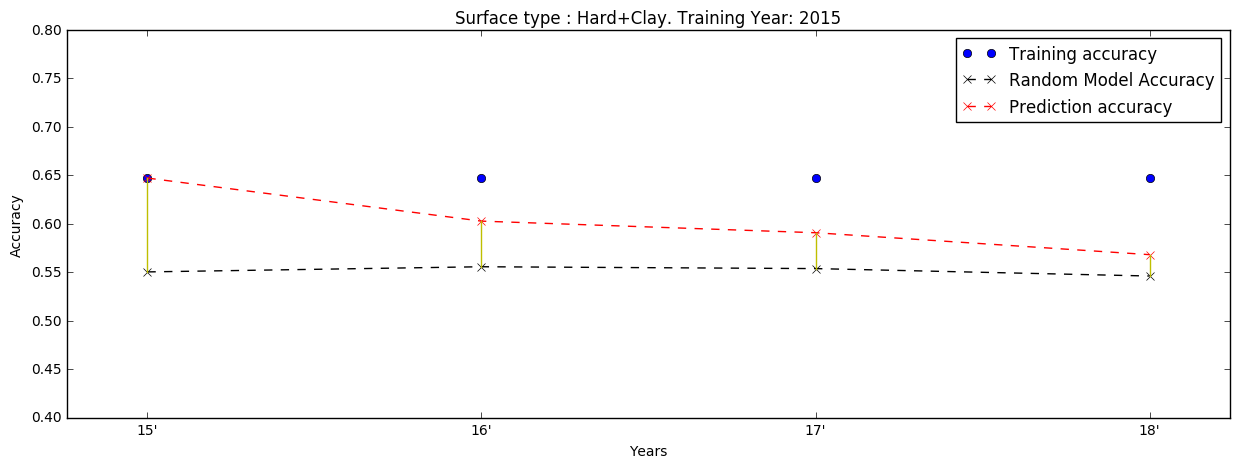

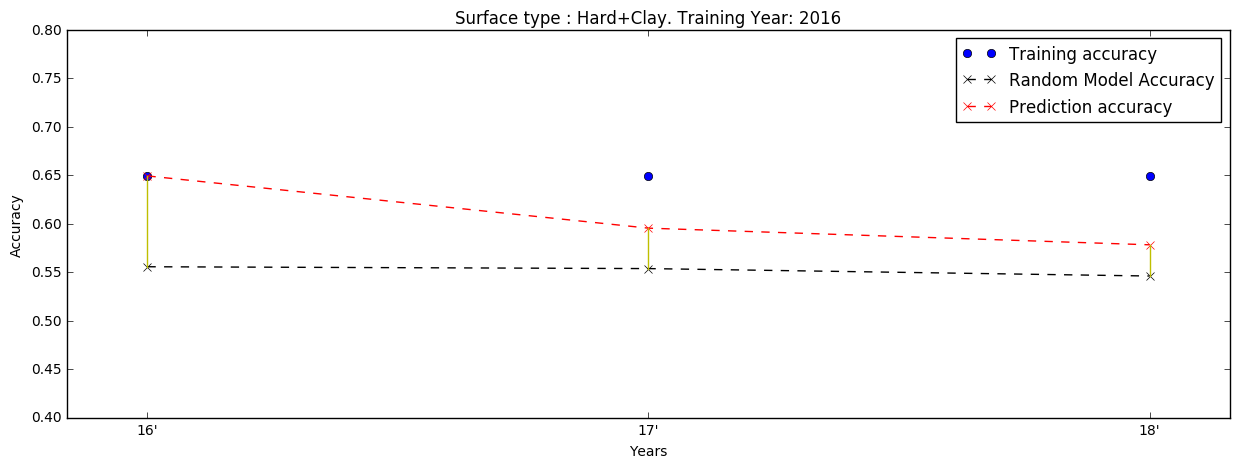

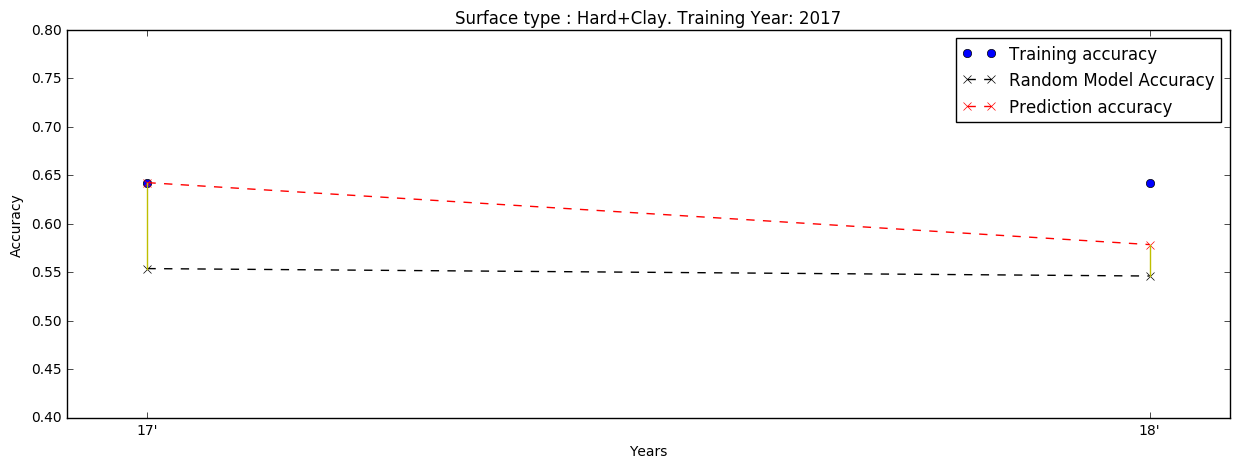

In [97]:
plotAllYears(Adj_years,accu_map_all,'Surface type : Hard+Clay.')

# Run experiment with matches played only on hard surface type

In [102]:
# Using only hard surface 
accu_map_all_hard = trainManyToMany(Adj_All_hard,Adj_years)

Optimal Beta: 0.685398270969711
Accuracy : 0.640325185074
Optimal Beta: 100.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in true_divide


Accuracy : nan
2008-->2008
Accuracy : 0.640325185074
Accuracy : 0.535536159601
2008-->2009
Accuracy : 0.594666176461
Accuracy : 0.537013801757
2008-->2010
Accuracy : 0.590004216522
Accuracy : 0.546068796069
2008-->2011
Accuracy : 0.584527292759
Accuracy : 0.540752351097
2008-->2012
Accuracy : 0.575709062805
Accuracy : 0.538779402416
2008-->2013
Accuracy : 0.568628056995
Accuracy : 0.534526051475
2008-->2014
Accuracy : 0.559989078899
Accuracy : 0.530997304582
2008-->2015
Accuracy : 0.555465887947
Accuracy : 0.532629558541
2008-->2016
Accuracy : 0.550913318707
Accuracy : 0.535580524345
2008-->2017
Accuracy : 0.547446397279
Accuracy : 0.538385175381
2008-->2018
Accuracy : 0.537004522638
Accuracy : 0.526079869601
Optimal Beta: 0.6582027894209499
Accuracy : 0.64550047051
Optimal Beta: 100.0
Accuracy : nan
2009-->2009
Accuracy : 0.64550047051
Accuracy : 0.537013801757
2009-->2010
Accuracy : 0.595510477942
Accuracy : 0.546068796069
2009-->2011
Accuracy : 0.586833073942
Accuracy : 0.5407523510

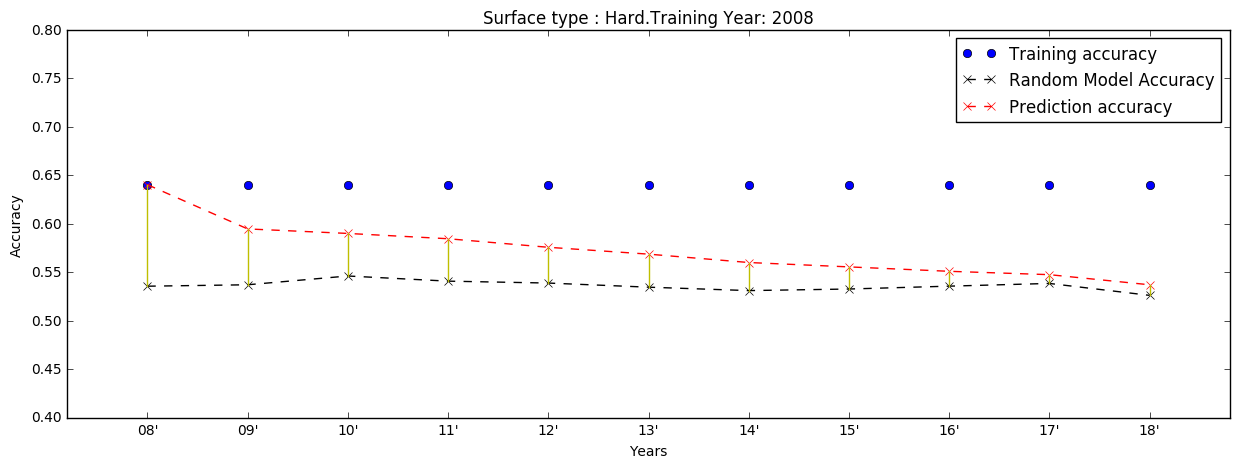

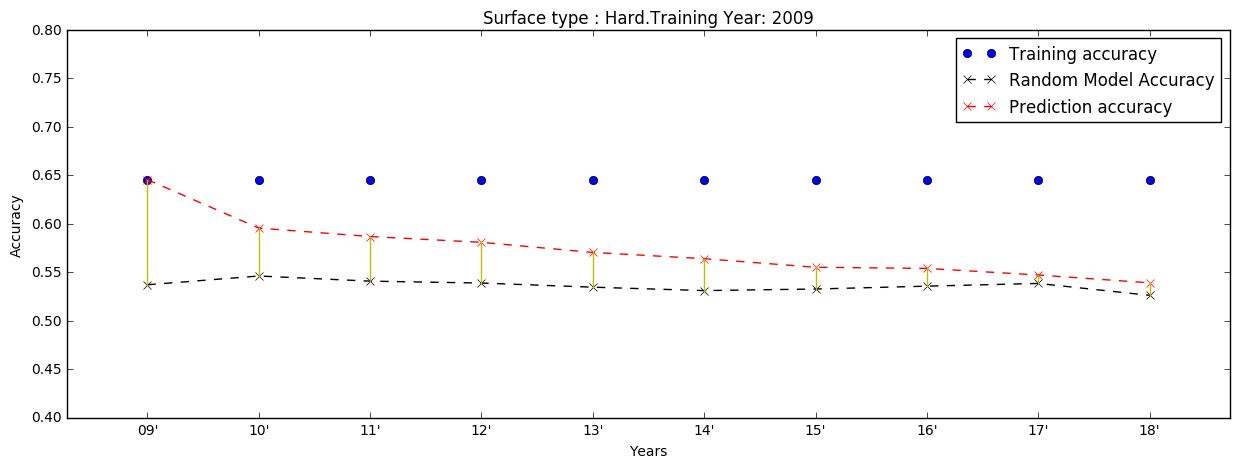

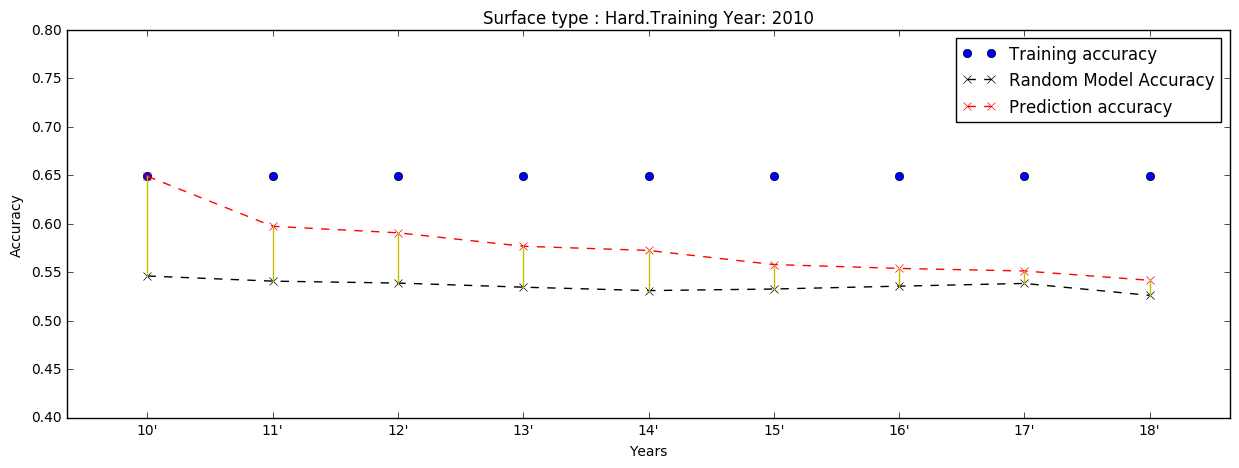

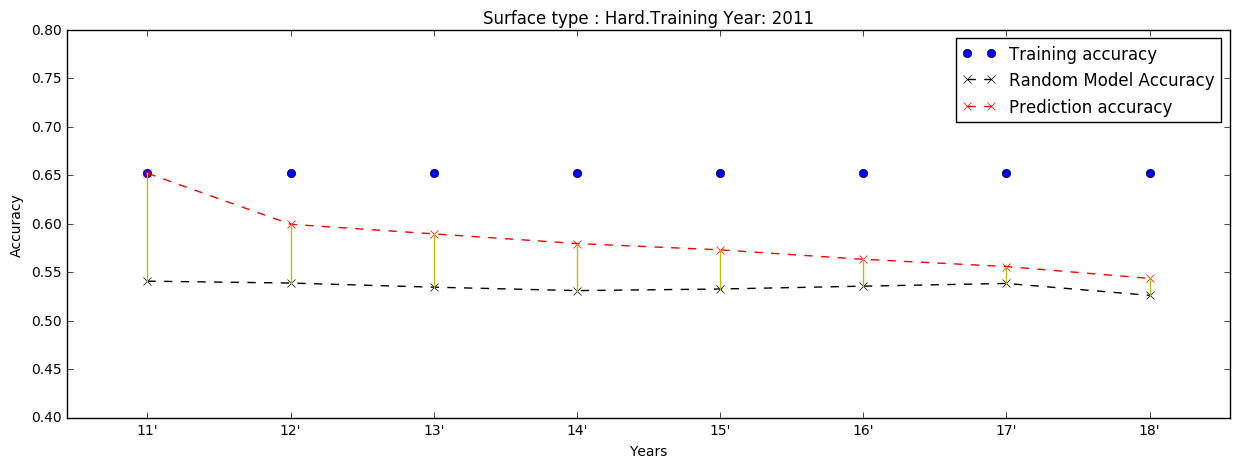

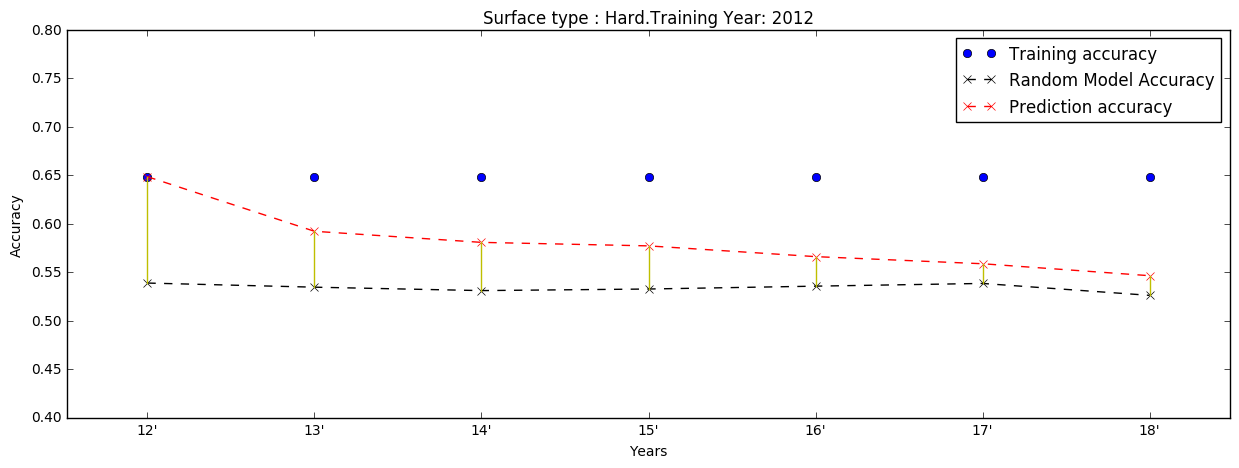

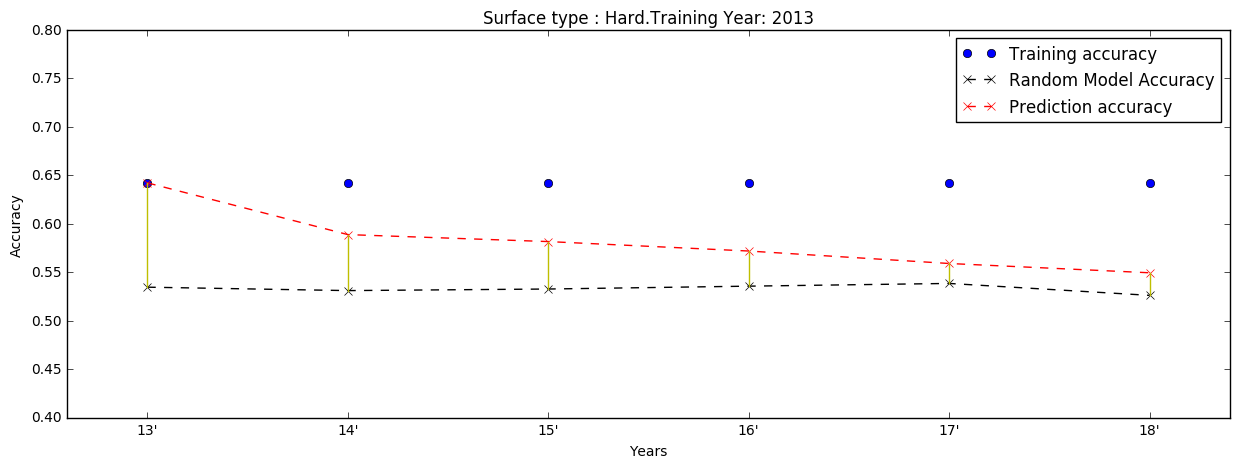

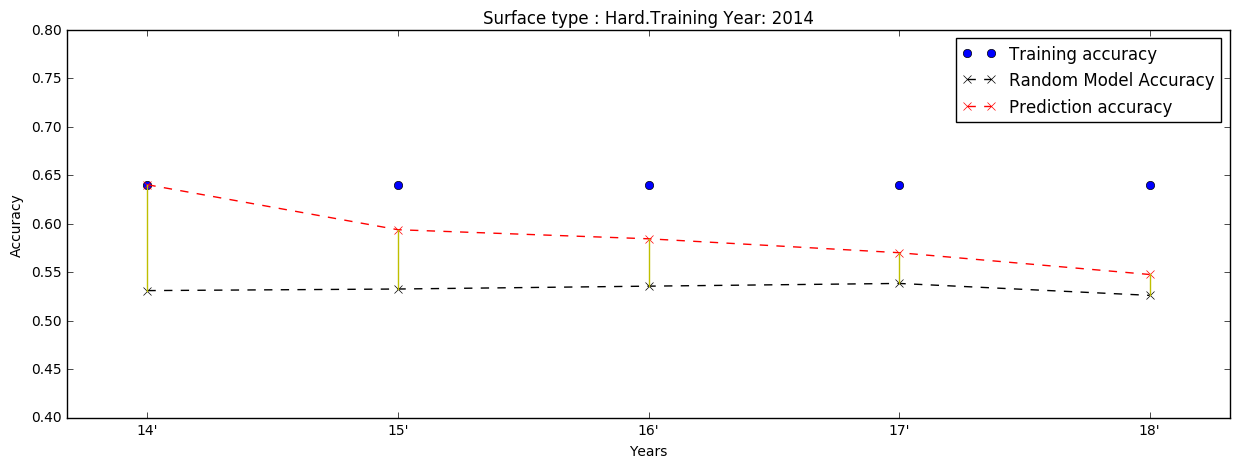

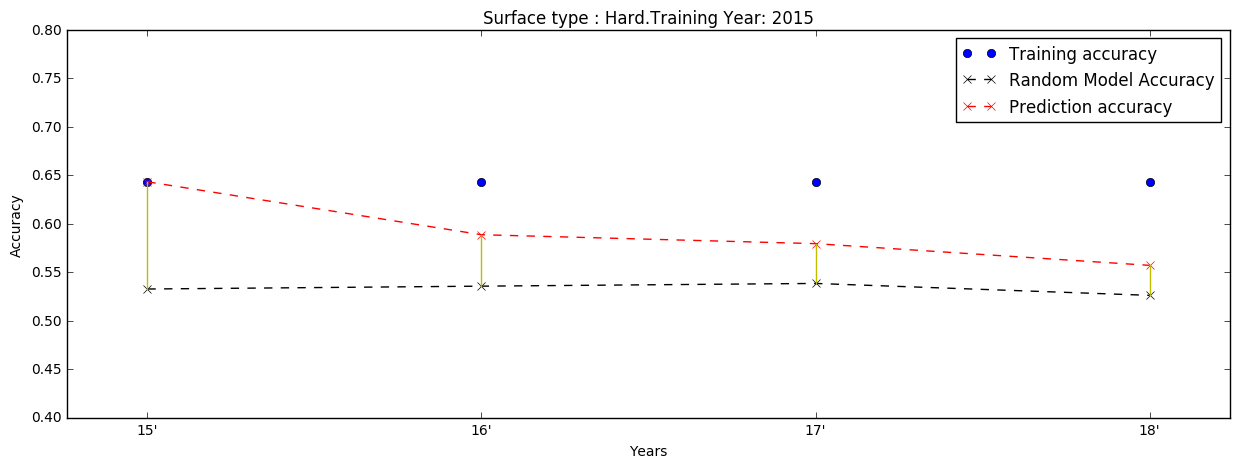

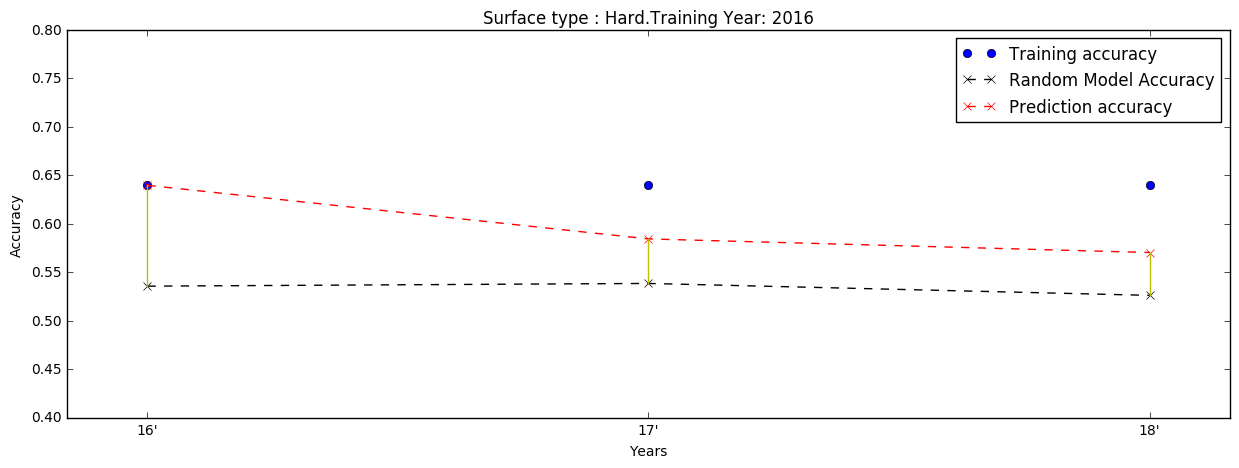

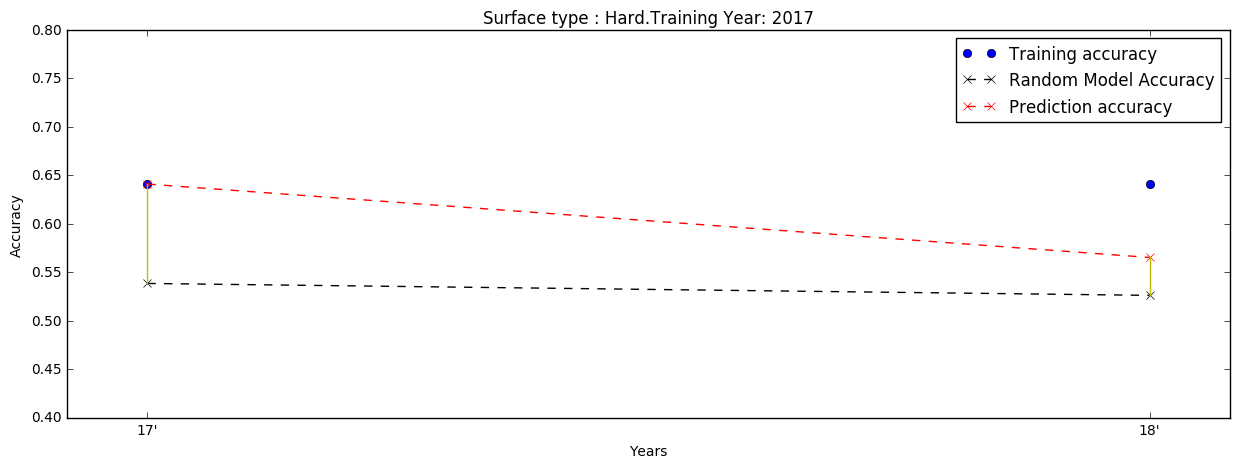

In [104]:
plotAllYears(Adj_years,accu_map_all_hard,'Surface type : Hard.')

# Run experiment with matches played only on Clay surface type

In [93]:
# Using only clay surface 
accu_map_all_clay = trainManyToMany(Adj_All_clay,Adj_years)

Optimal Beta: 0.5898605429398768
Accuracy : 0.632817606616
Optimal Beta: 100.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in true_divide


Accuracy : nan
2008-->2008
Accuracy : 0.632817606616
Accuracy : 0.520802377415
2008-->2009
Accuracy : 0.584169350698
Accuracy : 0.526315789474
2008-->2010
Accuracy : 0.568449105353
Accuracy : 0.523603461841
2008-->2011
Accuracy : 0.561692319338
Accuracy : 0.523659305994
2008-->2012
Accuracy : 0.565703281193
Accuracy : 0.523400936037
2008-->2013
Accuracy : 0.557087933095
Accuracy : 0.532608695652
2008-->2014
Accuracy : 0.554962924871
Accuracy : 0.529529130088
2008-->2015
Accuracy : 0.548934196718
Accuracy : 0.526644462948
2008-->2016
Accuracy : 0.537005986352
Accuracy : 0.524111675127
2008-->2017
Accuracy : 0.531624399562
Accuracy : 0.527687296417
2008-->2018
Accuracy : 0.529042109578
Accuracy : 0.523728813559
Optimal Beta: 0.6223548147090334
Accuracy : 0.640900273519
Optimal Beta: 100.0
Accuracy : nan
2009-->2009
Accuracy : 0.640900273519
Accuracy : 0.526315789474
2009-->2010
Accuracy : 0.57395005992
Accuracy : 0.523603461841
2009-->2011
Accuracy : 0.563359896077
Accuracy : 0.523659305

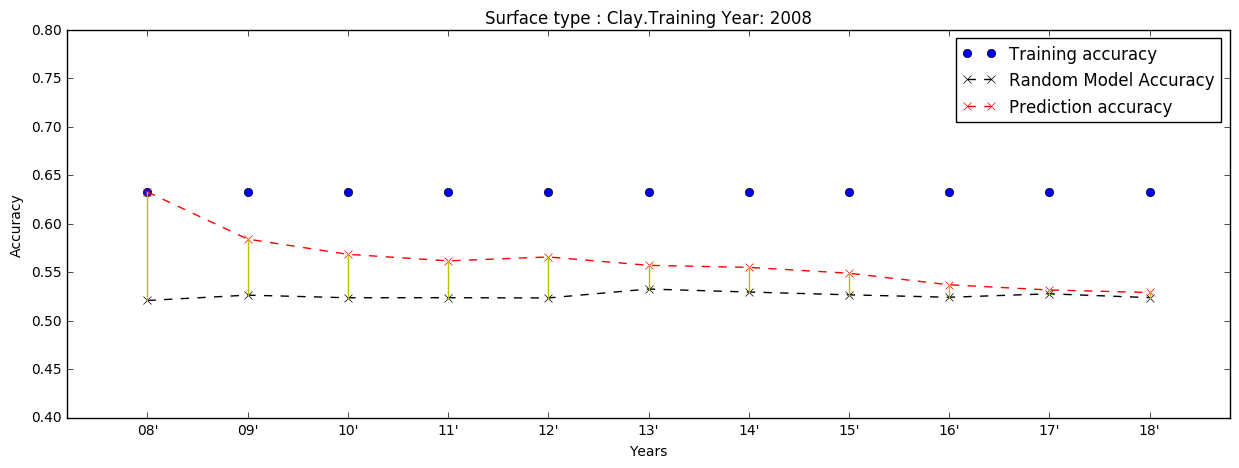

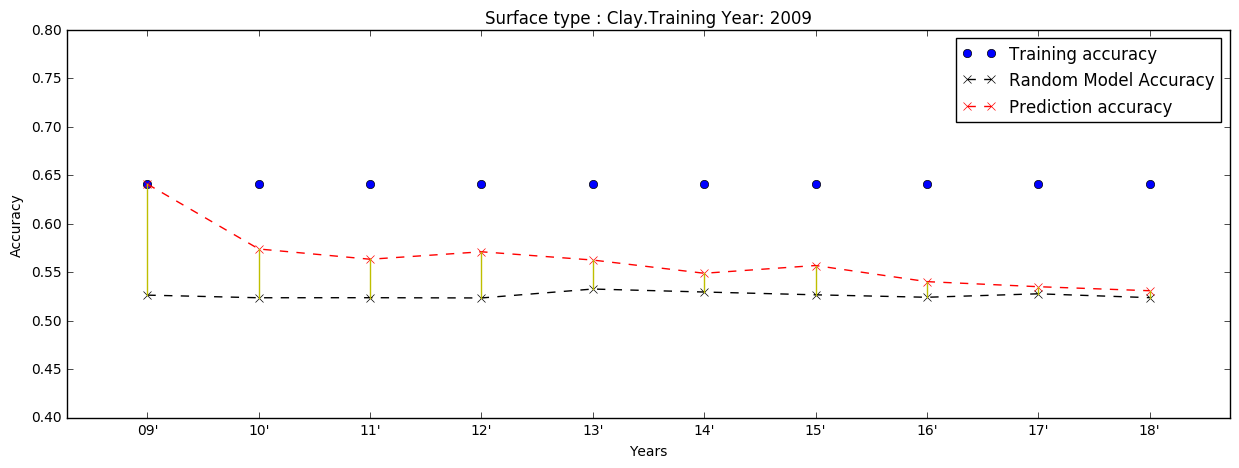

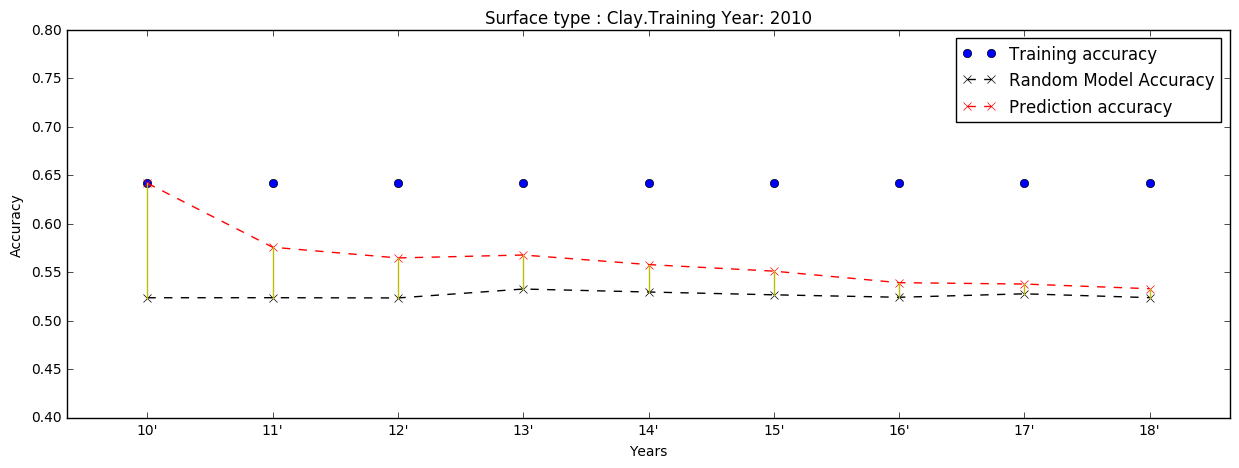

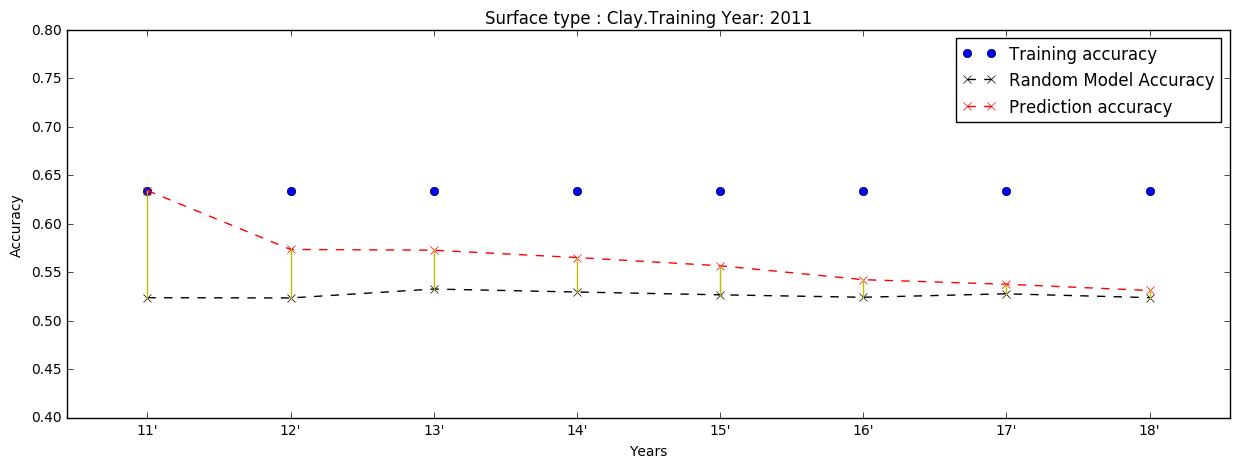

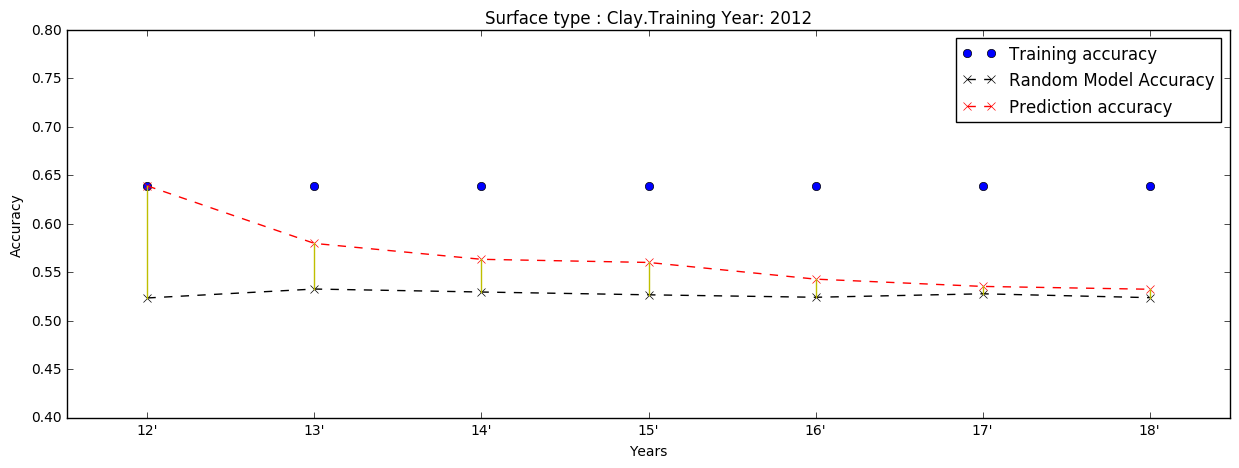

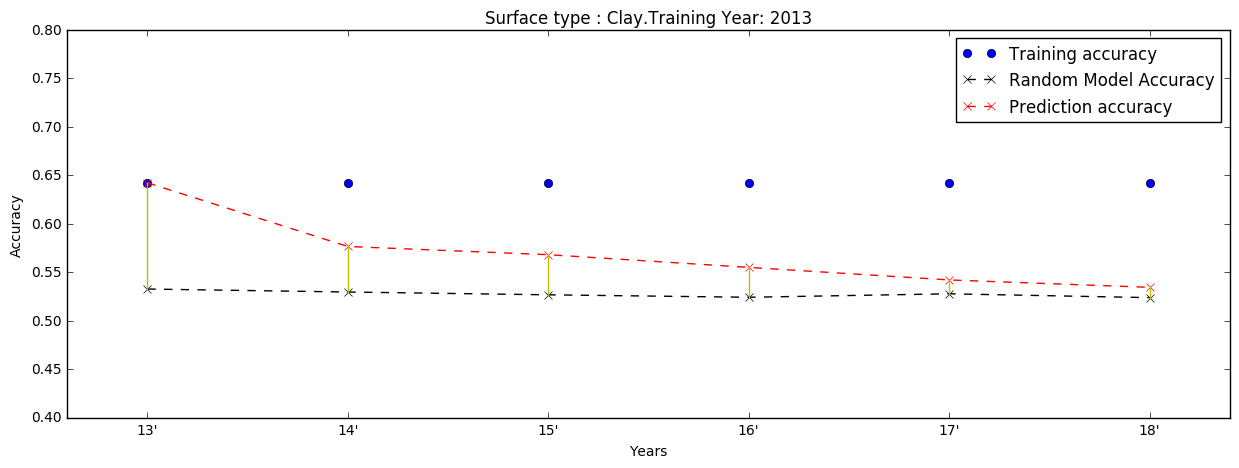

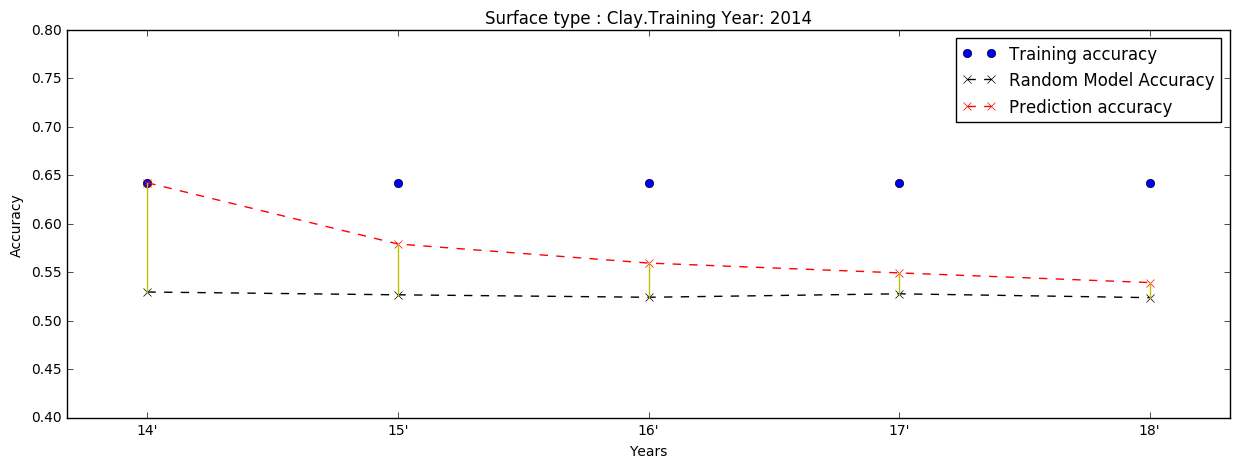

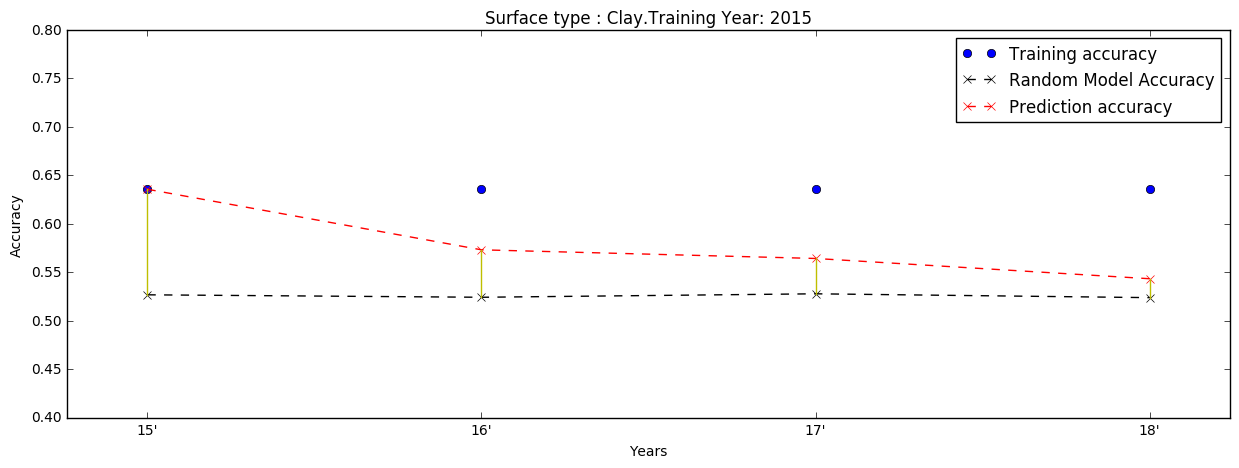

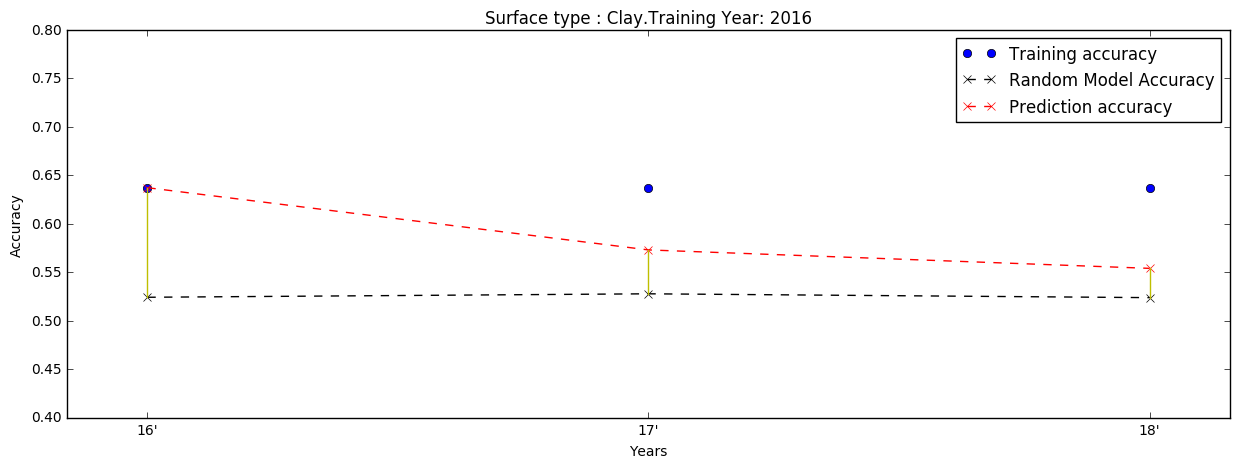

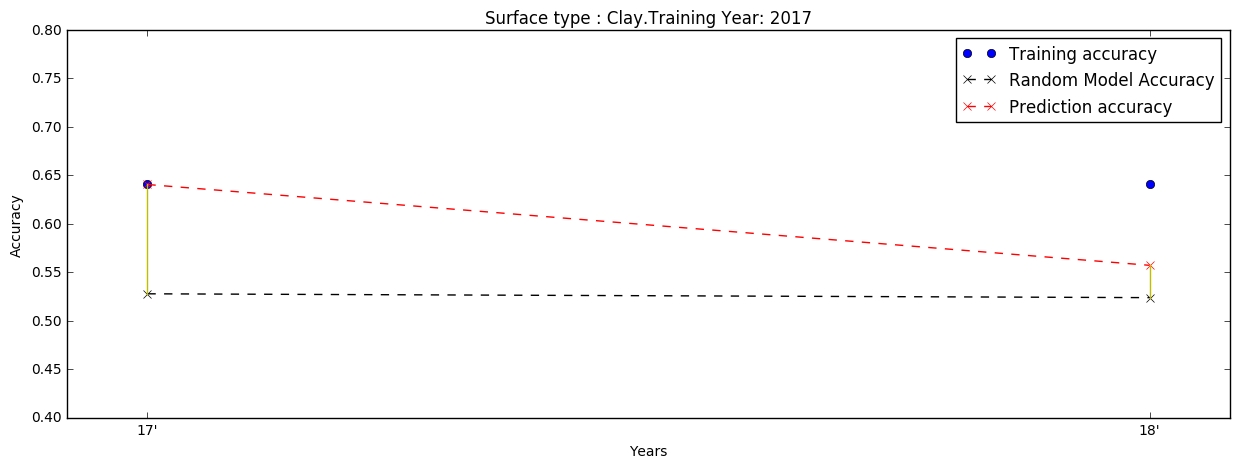

In [105]:
plotAllYears(Adj_years,accu_map_all_clay,'Surface type : Clay.')